In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import vr2p
import matplotlib.pyplot as plt

# Main parameters

In [ ]:
animal = "A7"
pix_size = np.array([1.333, 2])  # xy

# load data.
data = vr2p.ExperimentData(f"/.../Set A-E/Tyche-{animal}")
cell_info = data.cells.multi_session.registered
num_sessions = len(data.vr)

# Function to get image of cell crop each day

In [3]:

def get_cell_in_session_crop(i_cell, i_session, crop_um , data_type = "enhanced_img"):
    # get cell info.
    cell_loc_pix = np.array(cell_info[i_cell]["med"]).astype(int)
    cell_loc_um = cell_loc_pix * pix_size
    cell_loc_origin_um = cell_loc_um - crop_um
    cell_loc_origin_pix = (cell_loc_origin_um / pix_size).astype(int)
    crop_size_pix = (2 * crop_um / pix_size).astype(int)

    im = data.images.registered[i_session][data_type][
        cell_loc_origin_pix[0] : cell_loc_origin_pix[0] + crop_size_pix[0],
        cell_loc_origin_pix[1] : cell_loc_origin_pix[1] + crop_size_pix[1],
    ]
    return im

# Grid of cells across sessions

Text(0.01, 0.5, 'Cells')

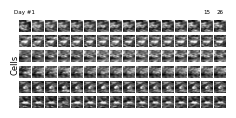

In [7]:
selected_cells = [1000,1007,1009,1012,903,905]
im_size_inch = [3.35,2] # 3.35
crop_um = 20
debug=False
fig, axs = plt.subplots(len(selected_cells), 16, figsize=im_size_inch,dpi=100)

for ax_i, i_cell in enumerate(selected_cells):
    for ax_j, i_session in enumerate(range(16)):
        if not debug:
            if i_session<15:
                im = get_cell_in_session_crop(i_cell, i_session, crop_um)
            else:
                im = get_cell_in_session_crop(i_cell, num_sessions-1, crop_um)
        else:
            im = np.zeros((10,10))
        axs[ax_i,ax_j].imshow(im, extent=[-crop_um, crop_um, -crop_um, crop_um], cmap="gray")
        axs[ax_i,ax_j].axis("off")
        # Add select title headers to indicate days.
        if (ax_i == 0) & (ax_j == 0):
            axs[ax_i,ax_j].set_title(f"Day #{i_session+1}", fontsize=4, y=0.85)
        if (ax_i == 0) & (ax_j == 14):
            axs[ax_i,ax_j].set_title(f"{i_session+1}", fontsize=4, y=0.85)
        if (ax_i == 0) & (ax_j == 15):
            axs[ax_i,ax_j].set_title(f"{num_sessions}", fontsize=4, y=0.85)            
# Adjust subplot parameters
fig.subplots_adjust(left=0.03, right=0.95, top=0.95, bottom=0.05, wspace=0.1, hspace=0.1)

# Add rotated label on the side
fig.text(0.01, 0.5, 'Cells', ha='center', va='center', rotation='vertical', fontsize=6)